# Building Machine Learning Pipelines: Data Analysis Phase

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Dispaly all the columns of the DataFrame
pd.pandas.set_option("display.max_columns",None)

In [2]:
auto=pd.read_csv('auto-mpg.csv')

In [3]:
## print the top 5 records
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
## print the last 5 records
auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
##
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
auto.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [8]:
auto.var()

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
weight          717140.990526
acceleration         7.604848
model year          13.672443
origin               0.643292
dtype: float64

In [9]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


### In Data Analysis We will Analyze To Find out the below stuff
1.Missing Values,
2.All The Numerical Variables
3.Distribution of the Numerical Variables
4.Categorical Variables
5.Cardinality of Categorical Variables
6.Outliers
7.Relationship between independent and dependent feature(mpg)

## Missing value

In [11]:
## Here we will chek the percentge of missing values of each feature 
## 1- step make the list of featute which has missing values

features_with_na=[feature for feature in auto.columns if auto[feature].isnull().sum()>1]

##2- step print the feature name and percentage of missing values
for feature in features_with_na:
    print(feature,np.round(auto[feature].isnull().mean(),4), '%missing values')

## Numerical Variables

In [12]:
## list of Numerical feature
numerical_features=[feature for feature in auto.columns if auto[feature].dtypes!='O']
print("Number of Numerical Variables:", len(numerical_features))

## Visibale the numeical variables
auto[numerical_features].head()

Number of Numerical Variables: 7


,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1


In [13]:
## Numerical variables are usually 2 types
## 1 Continuous Variables and Descrite Variables
discrete_feature=[feature for feature in numerical_features if len(auto[feature].unique())<25]
print("Discrete Variables Count:{}".format(len(discrete_feature)))

Discrete Variables Count:3


In [14]:
discrete_feature

['cylinders', 'model year', 'origin']

In [15]:
auto[discrete_feature].head()

,cylinders,model year,origin
0,8,70,1
1,8,70,1
2,8,70,1
3,8,70,1
4,8,70,1


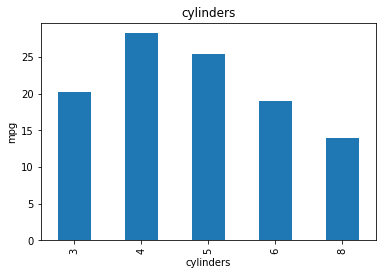

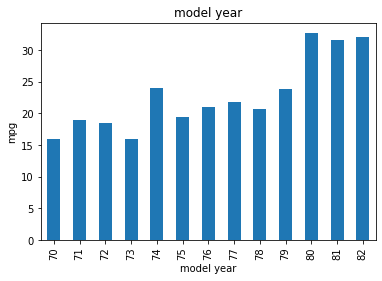

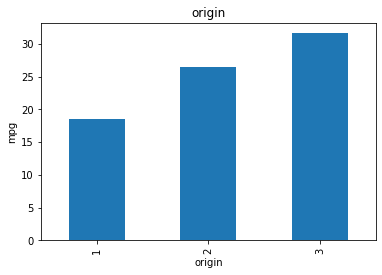

In [16]:
## lets Find the realtionship between them and mpg
for feature in discrete_feature:
    data=auto.copy()
    data.groupby(feature)['mpg'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('mpg')
    plt.title(feature)
    plt.show()

### Continuous Variable

In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Variables Count:{}'.format(len(continuous_feature)))


Continuous Variables Count:4


In [18]:
continuous_feature

['mpg', 'displacement', 'weight', 'acceleration']

In [19]:
## Visibels thecontinuoul variables
auto[continuous_feature].head()

,mpg,displacement,weight,acceleration
0,18.0,307.0,3504,12.0
1,15.0,350.0,3693,11.5
2,18.0,318.0,3436,11.0
3,16.0,304.0,3433,12.0
4,17.0,302.0,3449,10.5


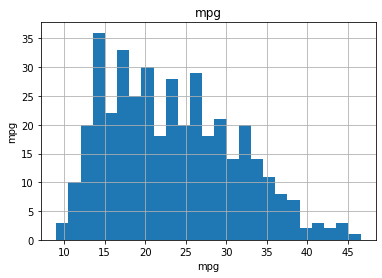

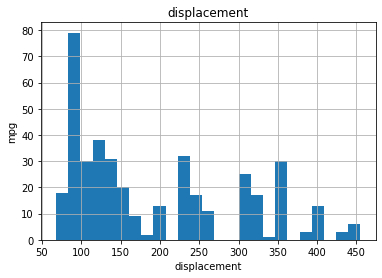

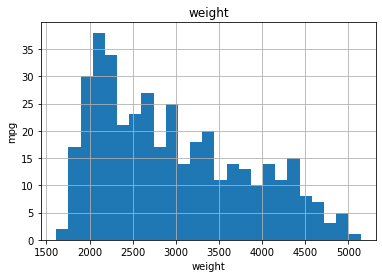

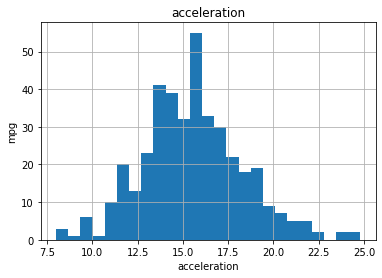

In [20]:
for feature in continuous_feature:
    data=auto.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('mpg')
    plt.title(feature)
    plt.show()

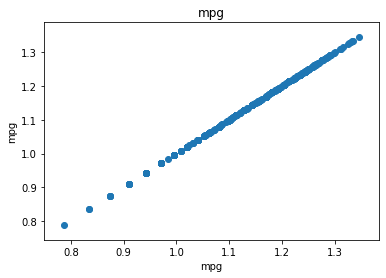

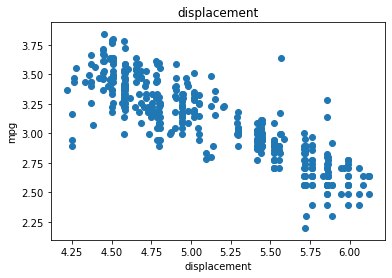

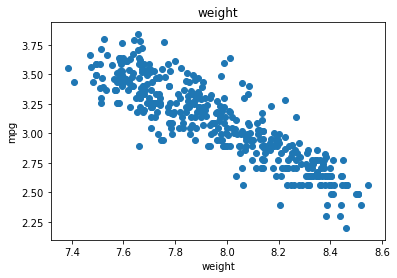

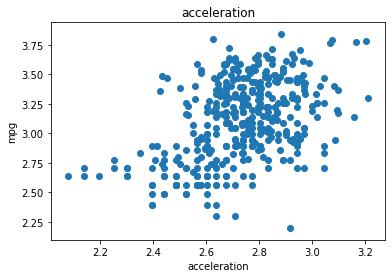

In [21]:
## We will be usimg a logarithmic transfrmation

for feature in continuous_feature:
    data=auto.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['mpg']=np.log(data['mpg'])
        plt.scatter(data[feature],data['mpg'])
        plt.xlabel(feature)
        plt.ylabel('mpg')
        plt.title(feature)
        plt.show()

## Outliers

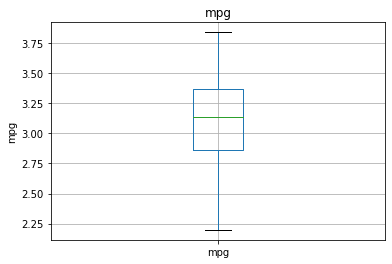

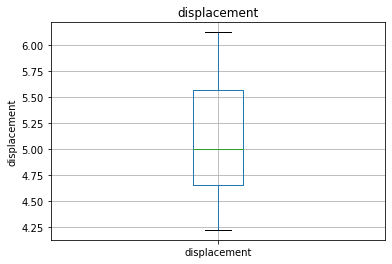

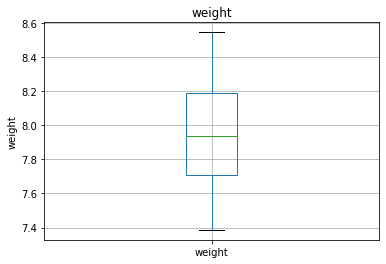

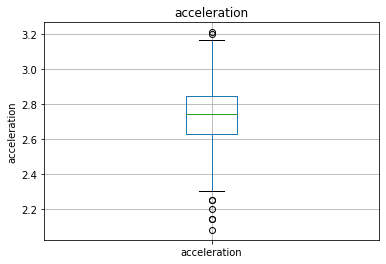

In [22]:
for feature in continuous_feature:
    data=auto.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

        

### Categorical Variables

In [23]:
categorical_feature=[feature for feature in auto.columns if auto[feature].dtypes=='O']
categorical_feature

['horsepower', 'car name']

In [24]:
auto[categorical_feature].head()

,horsepower,car name
0,130,chevrolet chevelle malibu
1,165,buick skylark 320
2,150,plymouth satellite
3,150,amc rebel sst
4,140,ford torino


In [25]:
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(auto[feature].unique())))

The feature is horsepower and number of categories are 94
The feature is car name and number of categories are 305


In [26]:
## Find out the relationship between categorical variable and dependent feature SalesPrice

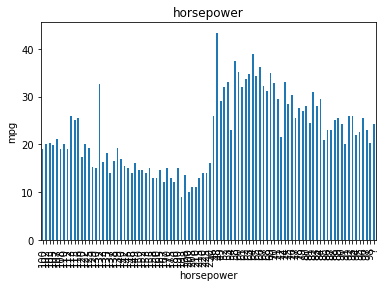

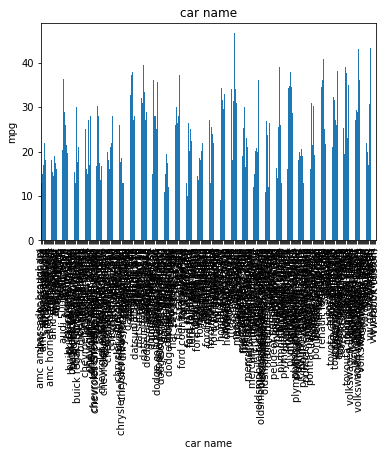

In [27]:
for feature in categorical_feature:
    data=auto.copy()
    data.groupby(feature)['mpg'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('mpg')
    plt.title(feature)
    plt.show()

## Feature Engineering

We will be performing all the below steps in Feature Engineering

1.Missing values
2.Categorical variables: remove rare labels
3.Standarise the values of the variables to the same range

In [28]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(auto,auto['mpg'],test_size=0.1,random_state=0)

In [29]:
X_train.shape, X_test.shape

((358, 9), (40, 9))

## Numerical Variables

Since the Numercial variables are skewes we will perform log normal distribution

In [30]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [31]:
num_feature=['mpg', 'cylinders', 'displacement','weight','acceleration', 'model year', 'origin']
for feature in num_feature:
    auto[feature]=np.log (auto[feature])

In [32]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,2.890372,2.079442,5.726848,130,8.161660,2.484907,4.248495,0.0,chevrolet chevelle malibu
1,2.708050,2.079442,5.857933,165,8.214194,2.442347,4.248495,0.0,buick skylark 320
2,2.890372,2.079442,5.762051,150,8.142063,2.397895,4.248495,0.0,plymouth satellite
3,2.772589,2.079442,5.717028,150,8.141190,2.484907,4.248495,0.0,amc rebel sst
4,2.833213,2.079442,5.710427,140,8.145840,2.351375,4.248495,0.0,ford torino


## Handling Rare Categorical Feature

In [33]:
ctegorical_feature=[feature for feature in auto.columns if auto[feature].dtypes=='O']
categorical_feature

['horsepower', 'car name']

In [34]:
for feature in categorical_feature:
    temp=auto.groupby(feature)['mpg'].count()/len(auto)
    temp_df=temp[temp>0.01].index
    auto[feature]=np.where(auto[feature].isin(temp_df),auto[feature],'Rare_var')

In [35]:
auto.head(100)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,2.890372,2.079442,5.726848,130,8.161660,2.484907,4.248495,0.000000,Rare_var
1,2.708050,2.079442,5.857933,165,8.214194,2.442347,4.248495,0.000000,Rare_var
2,2.890372,2.079442,5.762051,150,8.142063,2.397895,4.248495,0.000000,Rare_var
3,2.772589,2.079442,5.717028,150,8.141190,2.484907,4.248495,0.000000,Rare_var
4,2.833213,2.079442,5.710427,140,8.145840,2.351375,4.248495,0.000000,Rare_var
5,2.708050,2.079442,6.061457,Rare_var,8.375860,2.302585,4.248495,0.000000,Rare_var
6,2.639057,2.079442,6.118097,Rare_var,8.378850,2.197225,4.248495,0.000000,chevrolet impala
7,2.639057,2.079442,6.086775,Rare_var,8.369157,2.140066,4.248495,0.000000,Rare_var
8,2.639057,2.079442,6.120297,Rare_var,8.395026,2.302585,4.248495,0.000000,Rare_var
9,2.708050,2.079442,5.966147,Rare_var,8.255828,2.140066,4.248495,0.000000,Rare_var


In [36]:
for feature in categorical_feature:
    labels_ordered=auto.groupby([feature])['mpg'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    auto[feature]=auto[feature].map(labels_ordered)

In [37]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,2.890372,2.079442,5.726848,5,8.161660,2.484907,4.248495,0.0,5
1,2.708050,2.079442,5.857933,4,8.214194,2.442347,4.248495,0.0,5
2,2.890372,2.079442,5.762051,3,8.142063,2.397895,4.248495,0.0,5
3,2.772589,2.079442,5.717028,3,8.141190,2.484907,4.248495,0.0,5
4,2.833213,2.079442,5.710427,7,8.145840,2.351375,4.248495,0.0,5
5,2.708050,2.079442,6.061457,12,8.375860,2.302585,4.248495,0.0,5
6,2.639057,2.079442,6.118097,12,8.378850,2.197225,4.248495,0.0,0
7,2.639057,2.079442,6.086775,12,8.369157,2.140066,4.248495,0.0,5
8,2.639057,2.079442,6.120297,12,8.395026,2.302585,4.248495,0.0,5
9,2.708050,2.079442,5.966147,12,8.255828,2.140066,4.248495,0.0,5


## Feature Scaling

In [38]:
feature_scale=[feature for feature in auto.columns if feature not in ['mpg']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(auto[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [39]:
scaler.transform(auto[feature_scale])

array([[1.        , 0.79300726, 0.14285714, ..., 0.        , 0.        ,
        0.5       ],
       [1.        , 0.86197092, 0.11428571, ..., 0.        , 0.        ,
        0.5       ],
       [1.        , 0.81152779, 0.08571429, ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.29330495, 0.36078008, 0.8       , ..., 1.        , 0.        ,
        0.5       ],
       [0.29330495, 0.29881477, 0.34285714, ..., 1.        , 0.        ,
        0.5       ],
       [0.29330495, 0.29441226, 0.34285714, ..., 1.        , 0.        ,
        0.5       ]])

In [40]:
# transform the train and test set,and add on the mpg variables
data=pd.concat([auto[['mpg']].reset_index(drop=True),
               pd.DataFrame(scaler.transform(auto[feature_scale]),columns=feature_scale)],axis=1)

In [41]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,2.890372,1.0,0.793007,0.142857,0.669403,0.358374,0.0,0.0,0.5
1,2.708050,1.0,0.861971,0.114286,0.714732,0.320757,0.0,0.0,0.5
2,2.890372,1.0,0.811528,0.085714,0.652494,0.281468,0.0,0.0,0.5
3,2.772589,1.0,0.787841,0.085714,0.651740,0.358374,0.0,0.0,0.5
4,2.833213,1.0,0.784368,0.200000,0.655752,0.240351,0.0,0.0,0.5


## Feature Selection 

In [42]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [43]:
## Capture the dependent feature
y=data[['mpg']]

In [44]:
##drop dependent feature from dataset
X=data.drop(['mpg'],axis=1)

In [45]:
### Apply feature Selection
# first, I  specify the Lasso Regression model, and I
# select the suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will selected.

# Then I use the selectFromModel object from sklearn,which
# will select the feature coefficients are non-Zeor
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0)) # remember to set the seed, the random state in this finction
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [46]:
feature_sel_model.get_support()

array([ True,  True,  True,  True, False,  True,  True, False])

In [47]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 8
selected features: 6


In [48]:
selected_feat

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'model year',
       'origin'],
      dtype='object')

In [49]:
X=X[selected_feat]

In [50]:
X.head()

,cylinders,displacement,horsepower,weight,model year,origin
0,1.0,0.793007,0.142857,0.669403,0.0,0.0
1,1.0,0.861971,0.114286,0.714732,0.0,0.0
2,1.0,0.811528,0.085714,0.652494,0.0,0.0
3,1.0,0.787841,0.085714,0.651740,0.0,0.0
4,1.0,0.784368,0.200000,0.655752,0.0,0.0


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [52]:
X_train.shape,X_test.shape

((318, 6), (80, 6))

In [53]:
y_train.shape,y_test.shape


((318, 1), (80, 1))

In [54]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8949895119220778

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [55]:
## ShuffleSplit it use forspliting a data in equal amount
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.89808077, 0.88296522, 0.90113284, 0.88181418, 0.86649762])

#### We can see that in 5 iterations we get a score above 80% and near about 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

## Find best model using GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.886098,{'normalize': True}
1,lasso,-0.007075,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.836753,"{'criterion': 'mse', 'splitter': 'best'}"


#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Export the tested model to a pickle file

In [57]:
import pickle
with open('auto_mpg_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)